In [199]:
import numpy as np
import math
import scipy
import scipy.linalg
from matplotlib import pyplot as plt
%matplotlib inline
from sympy import *  # http://inp.nsk.su/~grozin/python/python7.html 
init_printing()
import mpl_toolkits.mplot3d 

1. Решите линейную систему:
np.array([[1, 2, 3] , [4, 0, 6],  [7, 8, 9]]) * X = np.array([[12, 2, 1]) 



In [13]:
Matrix(np.array([[1, 2, 3] , [4, 0, 6],  [7, 8, 9]]))

⎡1  2  3⎤
⎢       ⎥
⎢4  0  6⎥
⎢       ⎥
⎣7  8  9⎦

In [ ]:
1.1 A*X = B
A**(-1)*A*X = A**(-1)*B
E*X = A**(-1)*B
X = A**(-1)*B

1.2 Необходимо найти обратную матрицу A**(-1) = Ax и умножить её на B

1.3 A1 обратная матрица = транспонированная матрица алгебраических дополнений / детерминант = AmT/det_m

Детерминант из прошлого ДЗ
det_Ax = 60

Транспонированная матрица алгебраических дополнений из прошлого ДЗ
AxT =[[(-48) , ( 6) , (12)],
     [( 6) , (- 12) , ( 6)],
     [( 32) , (  -8) , ( 8)]] 

Обратная матрица A1
    [[(-0.8) , ( 0.1) , (0.2)],
     [( 0.1) , (- 0.2) , ( 0.1)],
     [( 8/15) , (  -2/15) , ( 2/15)]]

1.4  Умножение матриц A1*B

[[(-0.8)* 12 + ( 0.1) * 2 + (0.2) * 1 ],
[( 0.1) * 12 + (- 0.2) * 2 + ( 0.1)* 1],
[( 8/15) * 12 + (  -2/15) *2 + ( 2/15)* 1]] = 

=  [[-12*8/10 + 2/10 + 2/10 ],
    [12/10 - 4/10 + 1/10],
    [8*12/15 - 4/15 + 2/15]] = 

=  [[-92/10],
    [9/10],
    [94/15]]

Ответ: [-9.2 , 0.9 , 6(4/15)]



In [16]:
det_Ax = round(np.linalg.det(A))
print("Детерминант = ", det_Ax) 

Детерминант =  60.0


In [17]:
A1 = np.array([[(-0.8) , ( 0.1) , (0.2)],
     [( 0.1) , (- 0.2) , ( 0.1)],
     [( 8/15) , (  -2/15) , ( 2/15)]])
Matrix(A1)

⎡      -0.8                0.1                 0.2       ⎤
⎢                                                        ⎥
⎢       0.1                -0.2                0.1       ⎥
⎢                                                        ⎥
⎣0.533333333333333  -0.133333333333333  0.133333333333333⎦

In [12]:
# Проверка
A = np.array([[1, 2, 3] , [4, 0, 6],  [7, 8, 9]]) 
B = np.array([12, 2, 1]) 
X = np.linalg.solve(A,B)
print("Значения X равны:",  X)

Значения X равны: [-9.2         0.9         6.46666667]


In [ ]:
2. Найдите псевдорешение: [x, y, z]

In [107]:
A = np.array([[1, 2, -1] , [3, -4, 0],  [8, -5, 2], [2, 0, -5], [11, 4, -7]])
Matrix(A)

⎡1   2   -1⎤
⎢          ⎥
⎢3   -4  0 ⎥
⎢          ⎥
⎢8   -5  2 ⎥
⎢          ⎥
⎢2   0   -5⎥
⎢          ⎥
⎣11  4   -7⎦

In [80]:
B = np.array([[1],[7], [12], [7], [15]])
Matrix(B)

#B = np.array([ 1,7,12,7,15])

⎡1 ⎤
⎢  ⎥
⎢7 ⎥
⎢  ⎥
⎢12⎥
⎢  ⎥
⎢7 ⎥
⎢  ⎥
⎣15⎦

In [81]:
X = np.linalg.lstsq(A,B, rcond=None)
X

(array([[ 1.13919353],
        [-0.90498444],
        [-0.9009803 ]]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [82]:
print("Координаты псевдорешения x, y, z :", X[0][0], X[0][1], X[0][2])

Координаты псевдорешения x, y, z : [1.13919353] [-0.90498444] [-0.9009803]


In [83]:
# проверка
np.dot(A,[ 1.13919353, -0.90498444, -0.9009803 ] )

array([ 0.23020495,  7.03751835, 11.83650984,  6.78328856, 15.21805317])

In [85]:
def Q(x,y,z):
    return ((np.linalg.norm(np.dot(A,[x,y,z]) - B))**2)
Q(1.13919353, -0.90498444, -0.9009803)
# тут почему-то норма невязки не сошлась

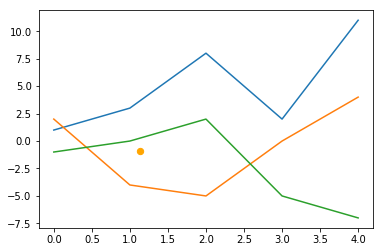

In [132]:
#plt.gca(projection='3d')  
plt.plot(A)
plt.scatter(1.13919353, -0.90498444,  color='orange', s=40, marker='o')
# сделать в 3д пока не получилось

In [ ]:
3. Сколько решений имеет линейная система:

In [158]:
A = np.array([[1, 2, 3] , [4, 5, 6],  [7, 8, 9]]) 
B = np.array([12,2,1])
# A*X = B
# Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [159]:
X = np.linalg.lstsq(A,B, rcond=None)
X
# ранг = 2, 2!=3, система не совместна.

(array([-7.69444444, -0.61111111,  6.47222222]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

In [160]:
np.linalg.det(A)
# Определитель равен нулю, матрица вырождена

In [161]:
#проверка
np.dot(A,[ -7.69444444, -0.61111111,  6.47222222 ] )
# решения не совпали

array([10.5       ,  5.00000001, -0.49999998])

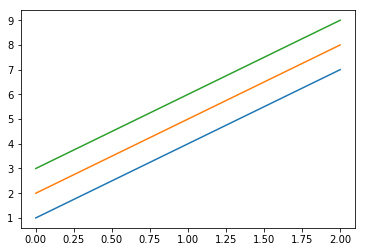

In [148]:
plt.plot(A)
# ого, прямые параллельны. Перекрестить прямые можно коэффициентом при переменных. Свободный член даст сдвиг.
# Вероятно их можно совместить, получив бесконечное множество решений.

In [173]:
B1 = np.array([[12,2,1]])

In [175]:
C = np.concatenate((A, B1.transpose()), axis = 1)
print(C)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


In [178]:
np.linalg.matrix_rank(A) , np.linalg.matrix_rank(C)

(2, 3)

In [189]:
A1 = np.array([[1, 2, 3] , [4, 5, 6],  [7, 8, 9]]) 
B1 = np.array([12,30,60])
X1 = np.linalg.lstsq(A1,B1, rcond=None)
print(np.linalg.det(A1))
X1

-9.51619735392994e-16


(array([ 5.66666667,  2.66666667, -0.33333333]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

In [ ]:
4. Вычислите LU-разложение матрицы:

In [190]:
A2 = np.array([[1, 2, 3] , [2, 16, 21],  [4, 28, 73]]) 
# После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [201]:
P, L, U = scipy.linalg.lu(A2)
print(L)
print(U)

[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [203]:
# A2 * X2 = B2
B2 = np.array([1,2,3])

In [205]:
X2 = np.linalg.lstsq(A2,B2, rcond=None)
X2

(array([ 1.01388889,  0.03472222, -0.02777778]),
 array([], dtype=float64),
 3,
 array([82.41767138,  7.1264625 ,  0.73551139]))

In [207]:
print("Значения матрицы Х2:", X2[0])

Значения матрицы Х2: [ 1.01388889  0.03472222 -0.02777778]


In [209]:
A3 = np.array([[1, 2, -1] , [8, -5, 2]]) 
B3 = np.array([1, 12]) 

# A3 * X3 = B3

X3 = np.linalg.lstsq(A3,B3, rcond=None)
X3

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

In [211]:
def Q(x,y,z):
    return ((np.linalg.norm(np.dot(A3,[x,y,z]) - B3))**2)
Q(1.38191882, -0.18081181,  0.0202952)


In [ ]:
5. Найдите нормальное псевдорешение недоопределенной системы:
    Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

In [ ]:
def Q(x,y,z):
    return ((np.linalg.norm(np.dot(A3,[x,y,z]) - B3))**2)
Q(1.38191882, -0.18081181,  0.0202952)

In [ ]:
6. Найдите одно из псевдорешений вырожденной системы:
    Попробуйте также отыскать и нормальное псевдорешение.

In [213]:
A5 = np.array([[1, 2, 3] , [4, 5, 6],  [7, 8, 9]]) 
B5 = np.array([2,5,11])
X5 = np.linalg.lstsq(A5,B5, rcond=None)
print(np.linalg.det(A5))
X5

-9.51619735392994e-16


(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))